In [1]:
import sys
sys.path.append('..')
import ugent

In [25]:
from strands import Schrodinger2D, Rectangle, Circle
import numpy as np
import math

c = 31

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5),
                  gridSize=(80, 80), maxBasisSize=60)
extremely_accurate = s.eigenvalues(60, shiftInvert=True, tolerance=1e-14)[:c]
extremely_accurate

[3.1959180852003035,
 5.52674387439505,
 5.526743874395072,
 7.557803326786431,
 8.031272340314258,
 8.444581361569961,
 9.928061056951636,
 9.928061056951764,
 11.31181705061858,
 11.311817050618659,
 12.103253578717073,
 12.201178967969994,
 13.332331271155676,
 14.348268533236217,
 14.348268533236656,
 14.450478721981446,
 14.580556315642388,
 16.151419224566343,
 16.151419224566556,
 16.51719246324957,
 16.564871925782185,
 17.894578279350526,
 17.894578279350707,
 18.58339173446746,
 18.756204272675834,
 18.75620427267612,
 18.976194433431186,
 19.5944751158256,
 20.735768151458437,
 20.920164347844604,
 21.29311188528165]

In [26]:
reported = np.array([3.1959181, 5.5267439, 5.5267439, 7.5578033, 8.0312723, 8.4445814, 9.9280611, 9.9280611, 11.3118171, 11.3118171, 12.1032536, 12.2011790, 13.3323313])

(reported - np.array(extremely_accurate)[:len(reported)])*10**8

array([ 1.47996966,  2.56049493,  2.5604928 , -2.67864309, -4.03142586,
        3.84300396,  4.30483649,  4.3048237 ,  4.93814216,  4.93813417,
        2.12829274,  3.20300053,  2.88443243])

In [ ]:
from tqdm import tqdm
from itertools import product

data = {}

ks = [15, 30, 45, 60]
ns = [30, 45, 70]
for k, n in tqdm(list(product(ks, ns))):
    s = Schrodinger2D(V, Rectangle(-10,10, -10,10),
                      gridSize=(n, n), maxBasisSize=k)
    data[(n, k)] = np.array(s.eigenvalues(c+10, tolerance=1e-14)[:c])

 17%|██▌            | 2/12 [00:04<00:23,  2.31s/it]

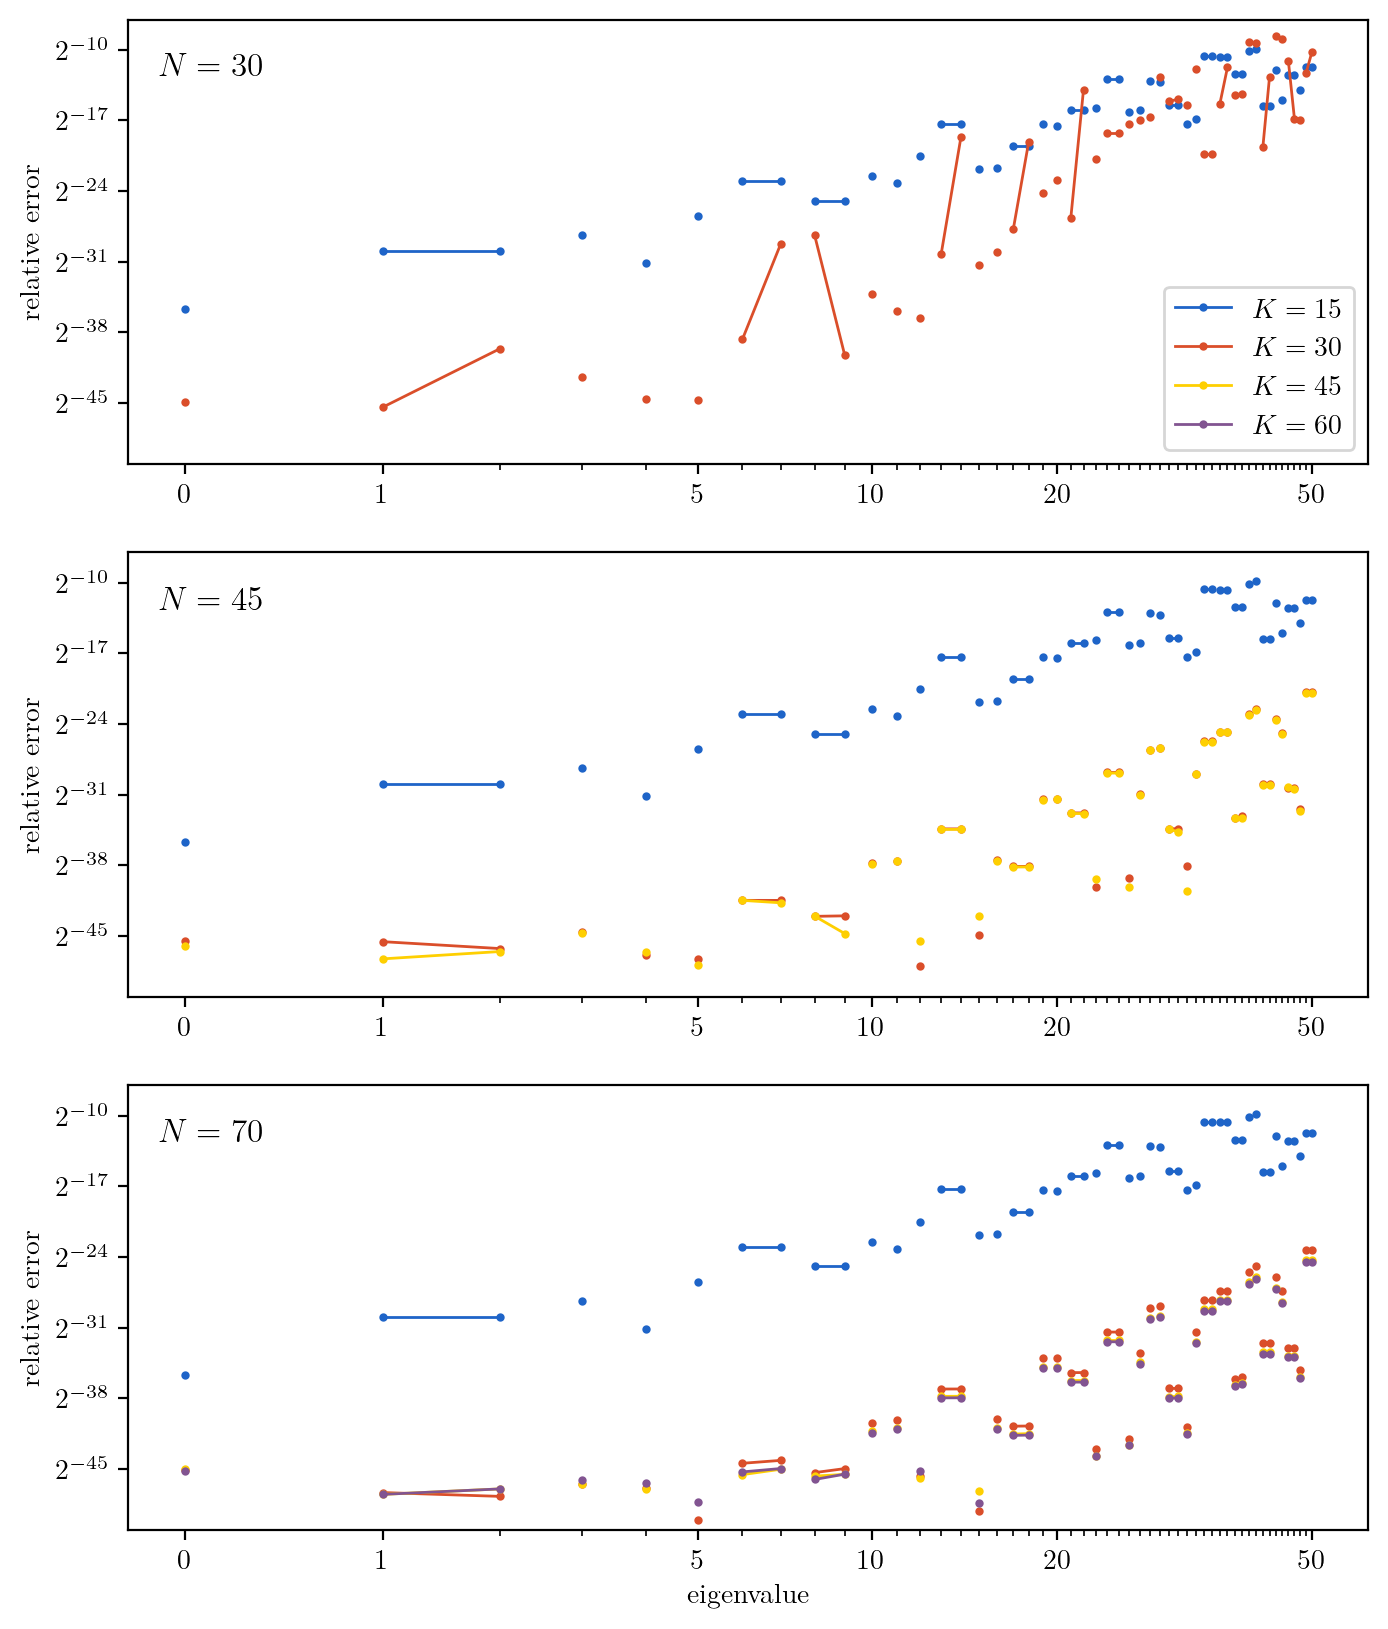

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FormatStrFormatter, ScalarFormatter


fig, axes = plt.subplots(3, 1, figsize=(8, 10), dpi=200)

mults = [1]
for i in range(1, c):
    if abs(extremely_accurate[i-1] - extremely_accurate[i]) < 1e-8:
        mults[-1] += 1
    else:
        mults.append(1)

for ni, n in enumerate(ns):
    ax = axes[ni]
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=2)
    xticks = [1, 2, 6, 11, 21, 51]
    ax.set_xticks(xticks, labels=[f"{x-1}" for x in xticks])
    ax.set_xticks(range(1, 51), labels=[], minor=True)
    ax.set_ylim(2**-51, 2**-7)
    ax.set_ylabel("relative error")
    if ni == 2:
        ax.set_xlabel("eigenvalue")

    for i, k in enumerate(ks):
        if k > n:
            continue
        j = 0
        r = np.abs((data[(n, k)] - extremely_accurate)/extremely_accurate)
        kwargs = dict(
            label=f"$K={k}$",
            color=ugent.palet[i],
            marker='.', ls='-', lw=1, markersize=4,
        )
        for mult in mults:
            d = r[j:j+mult]
            ax.plot(range(j + 1, j+len(d)+1), d, **kwargs)
            if j == 0:
                del kwargs["label"]
            j += mult
            if j >= len(r):
                break

    ax.set_title(f"$N = {n}$", y=0.835, x=0.025, loc="left")


axes[0].legend(*axes[2].get_legend_handles_labels(), loc="lower right")
    
fig.show()
plt.savefig(f"nm_test_ixaru.pdf", bbox_inches="tight")

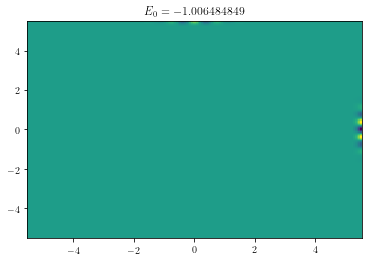

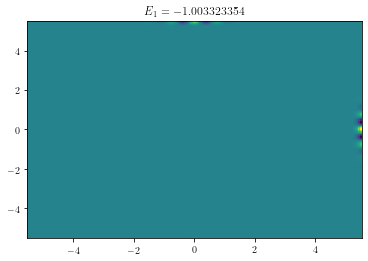

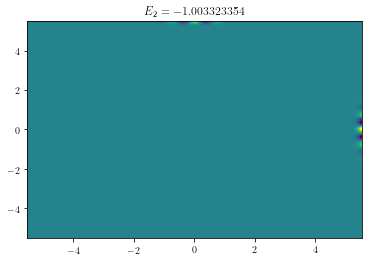

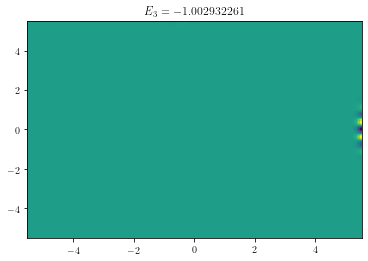

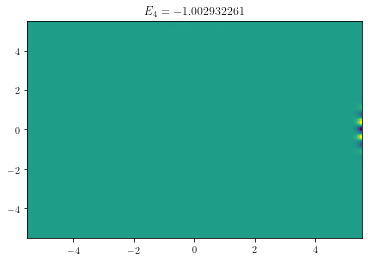

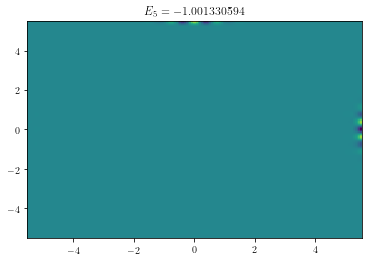

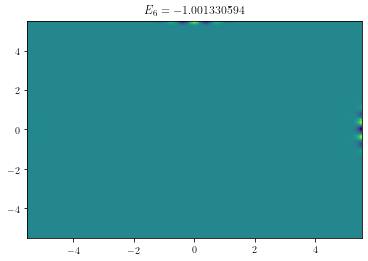

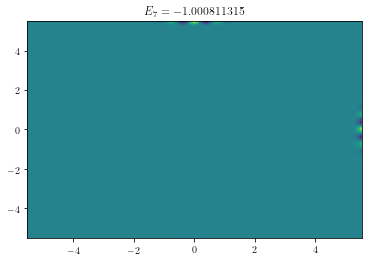

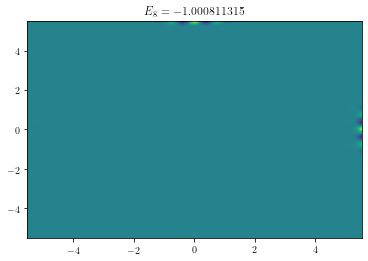

KeyboardInterrupt: 

In [23]:
from strands import Schrodinger2D, Rectangle

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

s = Schrodinger2D(V, Rectangle(-6,6, -6,6),
                  gridSize=(40, 40), maxBasisSize=40)

xs = np.linspace(-5.5,5.5, 200)
X, Y = np.meshgrid(xs, xs)
for i, (E, f) in enumerate(s.eigenfunctions(50)):
    plt.pcolormesh(X, Y, f(X, Y))
    plt.title(f"$E_{{{i}}} = {E:.9f}$")
    plt.show()